In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset-versions/homicides-new.csv')
display(df)

,State,Agentype,Source,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,...,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount
0,Alaska,Primary state LE,FBI,Yes,1976,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,48,...,American Indian or Alaskan Native,Unknown or not reported,55,Female,American Indian or Alaskan Native,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,0
1,Alabama,Municipal police,FBI,Yes,1976,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65,...,Black,Unknown or not reported,67,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,0
2,Alabama,Municipal police,FBI,Yes,1976,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,45,...,Black,Unknown or not reported,53,Male,Black,Unknown or not reported,Shotgun,Wife,Other,0
3,Alabama,Municipal police,FBI,Yes,1976,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,43,...,Black,Unknown or not reported,35,Female,Black,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,0
4,Alabama,Municipal police,FBI,Yes,1976,January,Adjustment,Murder and non-negligent manslaughter,Single victim/single offender,35,...,White,Unknown or not reported,25,Female,White,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868475,Wyoming,Sheriff,FBI,Yes,2022,August,Normal update,Murder and non-negligent manslaughter,Multiple victims/single offender,27,...,White,Not of Hispanic origin,26,Male,White,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Friend,Narcotic drug laws,1
868476,Wyoming,Municipal police,FBI,Yes,2022,November,Normal update,Manslaughter by negligence,Single victim/single offender,32,...,White,Not of Hispanic origin,34,Male,White,Not of Hispanic origin,"Narcotics or drugs, sleeping pills",Acquaintance,All other manslaughter by negligence,0
868477,Wyoming,Municipal police,FBI,Yes,2022,June,Normal update,Murder and non-negligent manslaughter,Multiple victims/single offender,36,...,White,Not of Hispanic origin,51,Male,White,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Other - known to victim,Other,1
868478,Wyoming,Municipal police,FBI,Yes,2022,June,Normal update,Murder and non-negligent manslaughter,Multiple victims/single offender,39,...,White,Not of Hispanic origin,51,Male,White,Not of Hispanic origin,"Handgun - pistol, revolver, etc",Other - known to victim,Other,1


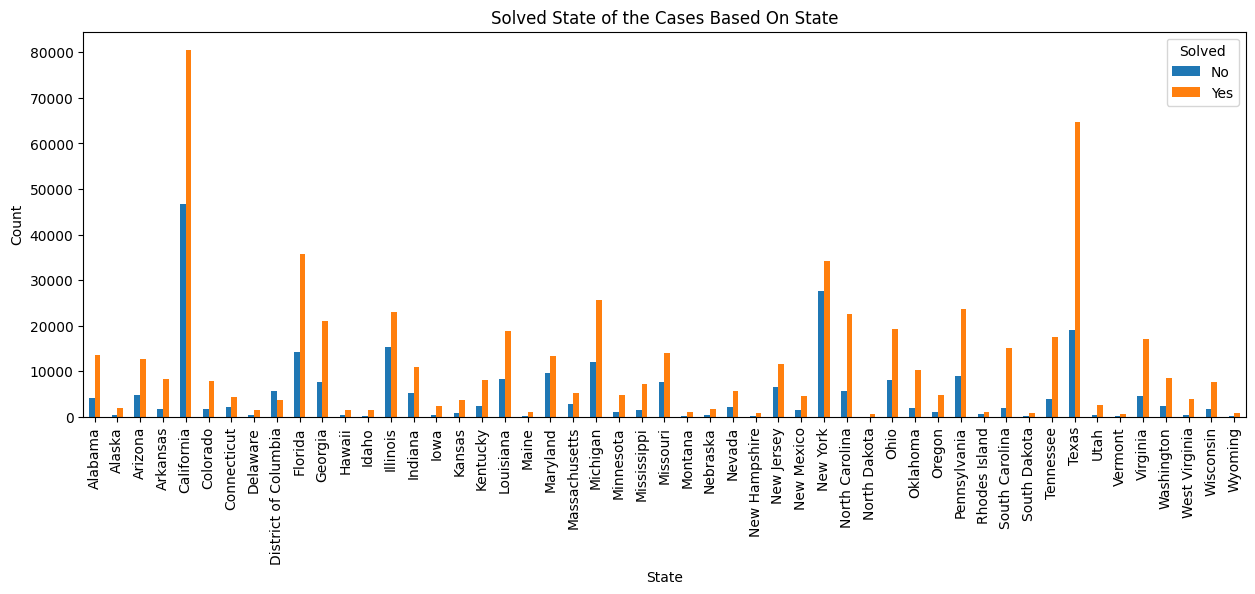

In [3]:
df.groupby('State')['Solved'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(15,5))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Solved State of the Cases Based On State')
plt.legend(title='Solved', loc='upper right')
plt.show()

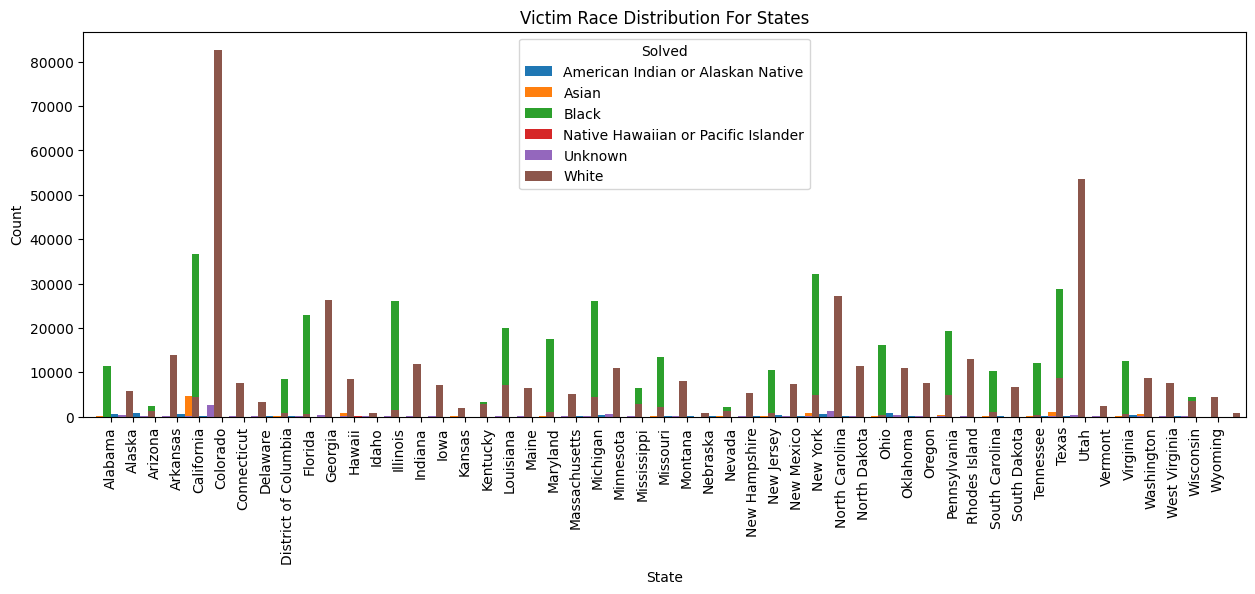

In [4]:
df.groupby('State')['VicRace'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(15,5), width=2)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Victim Race Distribution For States')
plt.legend(title='Solved', loc='upper center')
plt.show()

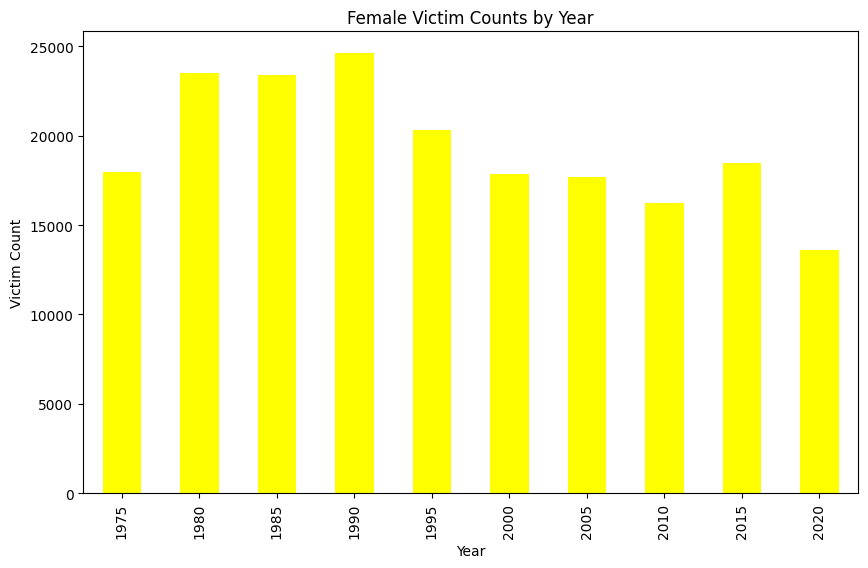

In [5]:
female = df[df['VicSex'] == 'Female']

# Group the DataFrame by year and victim sex, and calculate the count
female.groupby(df['Year'] // 5 * 5).size().plot(kind='bar', stacked=False, figsize=(10,6), color='yellow')

plt.xlabel('Year')
plt.ylabel('Victim Count')
plt.title('Female Victim Counts by Year')
plt.show()

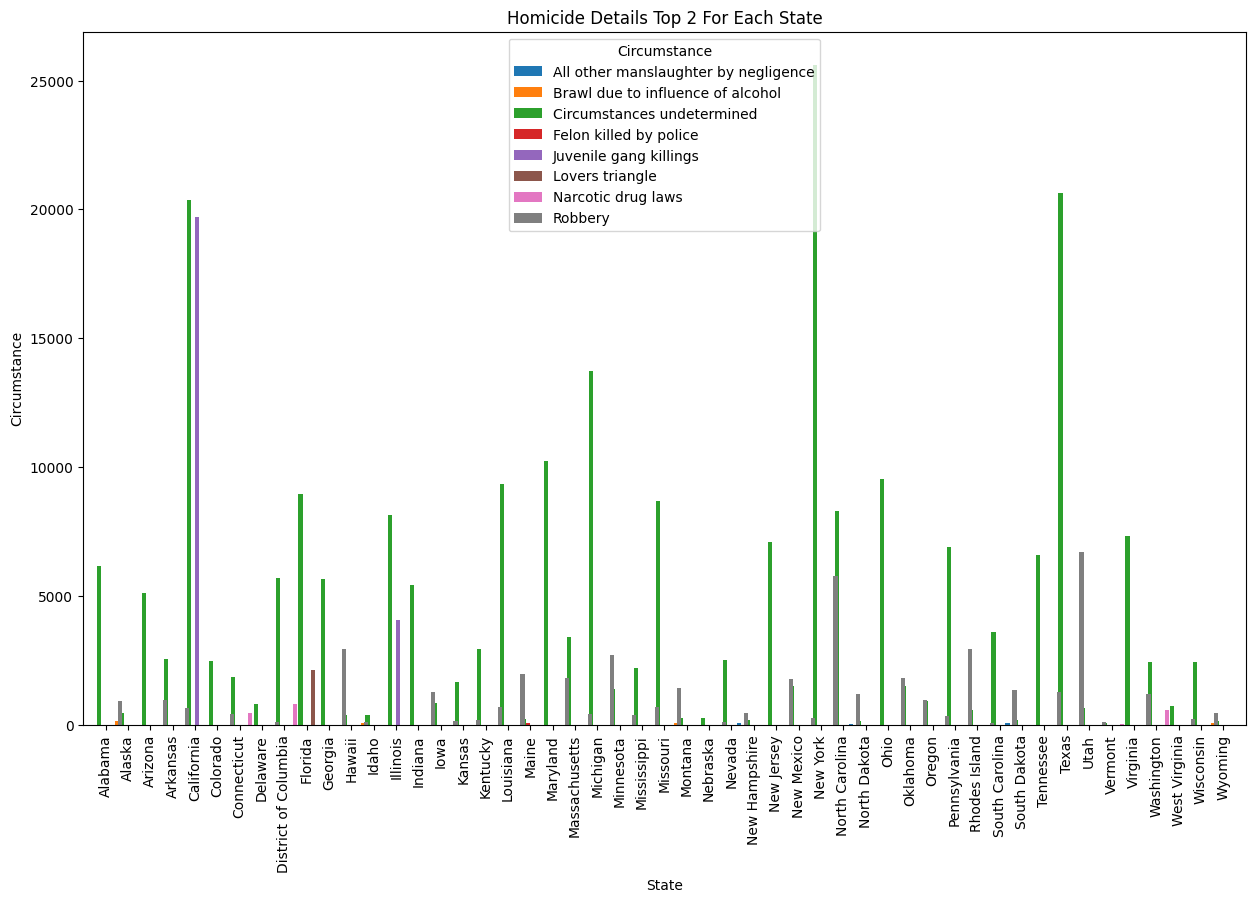

In [6]:
df_filtered = df.loc[~df['Circumstance'].str.contains('Other')]
df_grouped = df_filtered.groupby('State')['Circumstance'].value_counts().unstack()
# Get the top 3 circumstances for each state
df_top3 = df_grouped.apply(lambda x: x.nlargest(2), axis=1)

# Create a bar chart to visualize the top 3 circumstances for each state
df_top3.plot(kind='bar', stacked=False, figsize=(15,9), width=1.5)
plt.xlabel('State')
plt.ylabel('Circumstance')
plt.title('Homicide Details Top 2 For Each State')
plt.legend(title='Circumstance', loc='upper center')
plt.show()

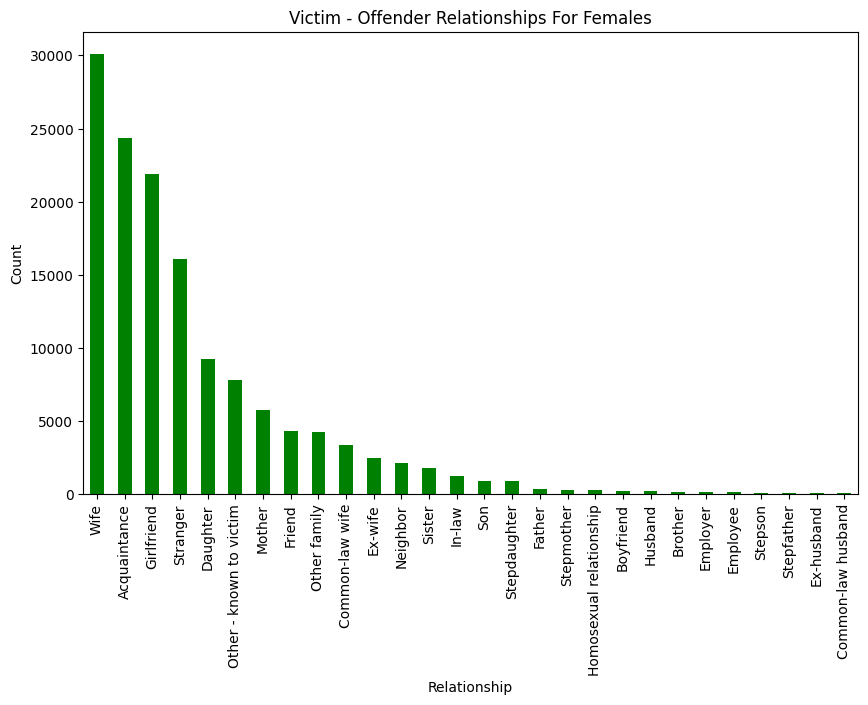

In [7]:
female = df[(df['VicSex'] == 'Female') & (df['Relationship'] != 'Relationship not determined')]

# Group the DataFrame by year and victim sex, and calculate the count
female['Relationship'].value_counts().plot(kind='bar', stacked=False, figsize=(10,6), color='green')

plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Victim - Offender Relationships For Females')
plt.show()

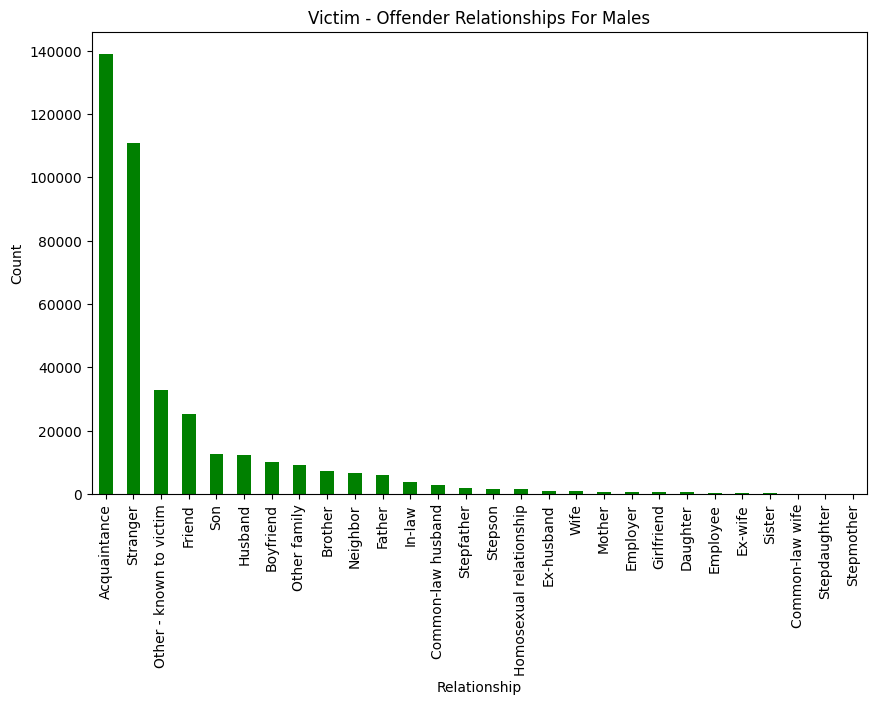

In [8]:
male = df[(df['VicSex'] == 'Male') & (df['Relationship'] != 'Relationship not determined')]

# Group the DataFrame by year and victim sex, and calculate the count
male['Relationship'].value_counts().plot(kind='bar', stacked=False, figsize=(10,6), color='green')

plt.xlabel('Relationship')
plt.ylabel('Count')
plt.title('Victim - Offender Relationships For Males')
plt.show()

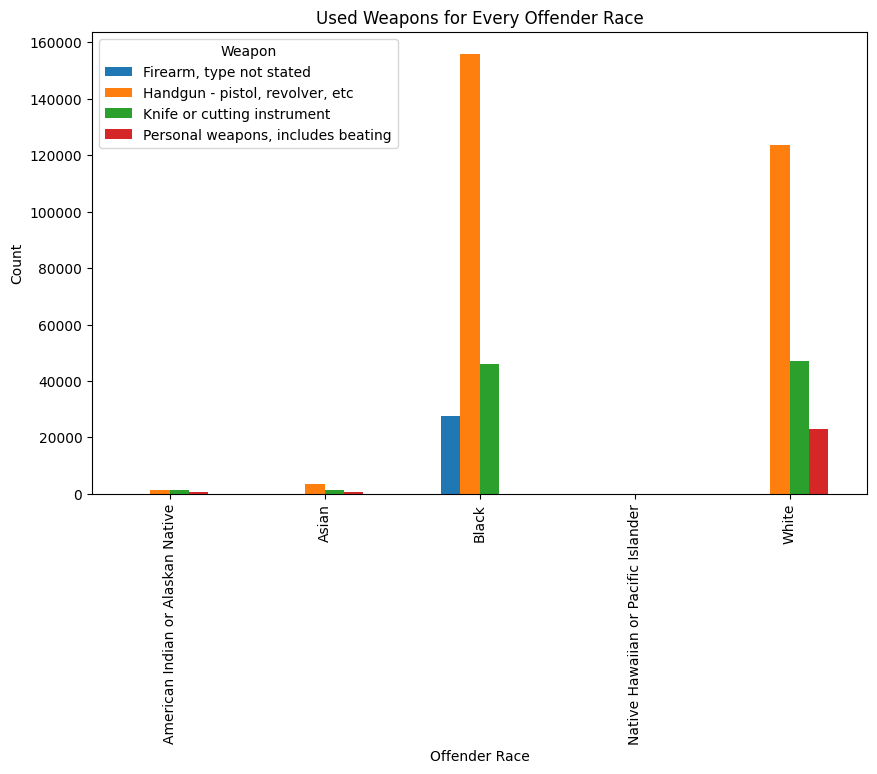

In [9]:
# Filter the DataFrame to include only the relevant columns
df_filtered = df[['OffRace', 'Weapon']]

df_filtered = df_filtered[df_filtered['OffRace'] != 'Unknown']

# Group the DataFrame by 'OffRace' and 'Weapon' and calculate the count
weapon_counts = df_filtered.groupby(['OffRace', 'Weapon']).size().unstack()

df_top3 = weapon_counts.apply(lambda x: x.nlargest(3), axis=1)

# Create a bar chart to visualize the count of used weapons for each offender race
df_top3.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.xlabel('Offender Race')
plt.ylabel('Count')
plt.title('Used Weapons for Every Offender Race')
plt.legend(title='Weapon')
plt.show()

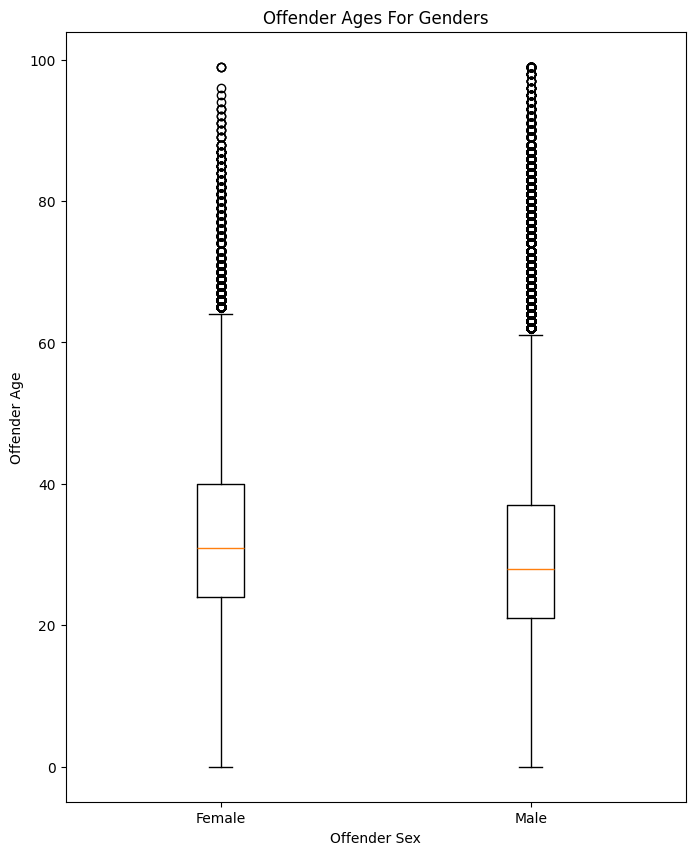

In [10]:
# Filter the DataFrame to include only the relevant columns
df_filtered = df[['OffAge', 'OffSex']]

# Sort the DataFrame by 'OffSex' and 'OffAge'
df_sorted = df_filtered.sort_values(by=['OffSex', 'OffAge'])

# Group the DataFrame by 'OffSex' and collect the ages as lists
age_by_gender = df_sorted.groupby('OffSex')['OffAge'].apply(list)

# Create a box plot to visualize the relationship between offender sex and age
plt.figure(figsize=(8, 10))
plt.boxplot([age_by_gender['Female'], age_by_gender['Male']], labels=['Female', 'Male'])

plt.xlabel('Offender Sex')
plt.ylabel('Offender Age')
plt.title('Offender Ages For Genders')
plt.show()